# Tutorial 7: Binary Trees
------------------------------------------------
Brady Kieffer - <bwkieffe@edu.uwaterloo.ca>

All of the tutorial related code / other documents will be on d2l as well as [this](https://github.com/bradykieffer/syde223) git repo.

I like using Jupyter notebooks as a way to try out code. If you want to learn more about installing Jupyter on your own machine just go [here](http://jupyter.org/).

## Introduction
-------------------

![TREES](https://imgs.xkcd.com/comics/tree.png)

- Not just invented to make undergraduates hate computers
- Used in a few of your later courses (SYDE 522 and SYDE 575)

We're going to look at implementing a Binary Search Tree (BST) using Python, a use case for binary trees (in machine learning) and then a quick Kahoot quiz.

#### Note

If you want to go into pretty much anything involving computers knowing how to implement a tree is a good idea. **But**, if you ever want to use these datastructures **please** check if it has already been implemented. For example, you never need to implement a `deque` in Python because they are already part of the `collections` module ([here's](https://docs.python.org/3/library/collections.html) a link). Google is your best friend when looking if someone else has already implemented something you want to use.

Let's go over the implementation of a Binary Search Tree first.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

### Let's start by defining a Skeleton of the final class

Full disclosure, I 100% have an implemented trees in `tree.py` in case things go south.

In [2]:
class BinarySearchTree(object):
    """ Store values within a binary tree structure for later lookup. """
    def __init__(self):
        self.root = None
        self._size = 0  # Do not want to directly modify this

    @property
    def length(self):
        return self._size

    def __len__(self):
        return self._size

This is a pretty simple structure initially, if we create it we can see that it indeed contains no nodes and has zero length

In [3]:
tree = BinarySearchTree()
print('Length of tree is', len(tree), 'do the properties work?', len(tree) == tree.length)

Length of tree is 0 do the properties work? True


### Before doing anything with the tree we need a Node class

This will allow us to link nodes together starting from the root. The tree only needs to keep track of it's own root at any given moment and nodes will do the rest. For a binary search tree there are five things each node should keep track of:

1. A key
2. A value to associate with the key
3. A pointer to a left child node
4. A pointer to a right child node
5. A point to the parent of the node

They don't need to actually have all of these variables given when created.

In [4]:
class Node(object):
    """ A node within a binary tree. """
    def __init__(self, key, val, left=None, right=None, parent=None):
        self.key = key
        self.value = val
        self.left_child = left
        self.right_child = right
        self.parent = parent

    def __repr__(self):
        return f'<Node: [{self.key}: {self.value}]>'

    def has_both_children(self):
        return self.left_child is not None and self.right_child is not None

    def has_children(self):
        return not self.is_leaf

    def has_left_child(self):
        return self.left_child is not None

    def has_right_child(self):
        return self.right_child is not None

    def is_left_child(self):
        return self.parent and self.parent.left_child == self

    def is_right_child(self):
        return self.parent and self.parent.right_child == self

    def is_root(self):
        # What makes a node a root node?
        return self.parent is None
    
    def is_leaf(self):
        # What makes a node a leaf?
        return self.left_child is None and self.right_child is None

In [5]:
# Let's look at our new Node class
node = Node(0, 'I\'m a node!!!')

In [6]:
print('Key:', node.key, '\tValue:', node.value)

Key: 0 	Value: I'm a node!!!


In [7]:
# We could put in anything as a key or value really
node = Node(node.value, node.key)
print('Key:', node.key, '\tValue:', node.value)

Key: I'm a node!!! 	Value: 0


In [8]:
print('Am I a root?', node.is_root(), '\nAm I a leaf?', node.is_leaf())

Am I a root? True 
Am I a leaf? True


With the above implementation, we can actually start to create the binary search tree class. We should start by defining an insertion method which will put a `Node` object into the tree.

In [9]:
class BinarySearchTree(object):
    """ Store values within a binary tree structure for later lookup. """
    def __init__(self):
        self.root = None
        self._size = 0  # Do not want to directly modify this

    @property
    def length(self):
        return self._size

    def __len__(self):
        return self._size
    
    def insert(self, key, value):
        if self.root is None:
            # Create a root
            self.root = Node(key, value)
            
        else:
            # Need to recursively call an insert function here
            self._insert(key, value, current_node=self.root)
        self._size += 1
        
    def _insert(self, key, value, current_node):
        if key < current_node.key:
            # Key is less than the current nodes key, it should go left
            if not current_node.has_left_child():
                current_node.left_child = Node(key, value, parent=current_node)
            else:
                self._insert(key, value, current_node=current_node.left_child)
        else:
            # Key is greater than the current_nodes key
            # What do we do here?
            if not current_node.has_right_child():
                current_node.right_child = Node(key, value, parent=current_node)
            else:
                self._insert(key, value, current_node=current_node.right_child)

In [19]:
# Let's test out this new functionality
tree = BinarySearchTree()

In [20]:
tree.insert(0, 1)
tree.insert(-1, 2)
tree.insert(2, 'Binary Trees are so fun....')

In [22]:
print(tree.root, tree.root.right_child.value, tree.root.right_child.right_child)

<Node: [0: 1]> Binary Trees are so fun.... None


### Searching for values AKA the entire point of these things
Now that we can insert values it would be great if we could actually find them in the tree, let's do that 

In [25]:
class BinarySearchTree(object):
    """ Store values within a binary tree structure for later lookup. """
    def __init__(self):
        self.root = None
        self._size = 0  # Do not want to directly modify this

    @property
    def length(self):
        return self._size

    def __len__(self):
        return self._size
    
    def insert(self, key, value):
        if self.root is None:
            # Create a root
            self.root = Node(key, value)
            
        else:
            # Need to recursively call an insert function here
            self._insert(key, value, current_node=self.root)
        self._size += 1
        
    def _insert(self, key, value, current_node):
        if key < current_node.key:
            # Key is less than the current nodes key, it should go left
            if not current_node.has_left_child():
                current_node.left_child = Node(key, value, parent=current_node)
            else:
                self._insert(key, value, current_node=current_node.left_child)
        else:
            # Key is greater than the current_nodes key
            if not current_node.has_right_child():
                current_node.right_child = Node(key, value, parent=current_node)
            else:
                self._insert(key, value, current_node=current_node.right_child)

    def get(self, key):
        """ Take a key and find it in our tree. """
        if self.root is None:
            return None
        else:
            result = self._get(key, current_node=self.root)
            if result is None:
                return None
            else:
                return result.value
            
    def _get(self, key, current_node):
        # What do we do if current node is None? What does that mean?
        if current_node is None:
            # What do we do here?
            return None
        elif current_node.key == key:
            # We found it!
            return current_node
        # How do we traverse the tree?
        else:
            if key < current_node.key:
                return self._get(key, current_node=current_node.left_child)
            else:
                return self._get(key, current_node=current_node.right_child)

In [26]:
tree = BinarySearchTree()

In [33]:
tree.insert('b', 1)
tree.insert('a', 2)
tree.insert('c', 'Binary Trees are so fun....')

In [34]:
print('Let\'s get all the values we just inserted', tree.get('a'), tree.get('b'), tree.get('c'))

Let's get all the values we just inserted 2 1 Binary Trees are so fun....


### Making the Tree more Pythonic
It would be nice to have the tree implement some common syntactic sugar that Python enables, for example:
```python
>>> tree['Where will ASG be?'] = 'Who knows'
>>> tree.get('Where will ASG be?')
'Who knows'
...
>>> tree['Where will ASG be?'] = 'Stop asking'
>>> tree['Where will ASG be?']
'Stop asking'
```
Does anyone know what we need to implement to do this? The `__setitem__` and `__getitem__` functions of course!

In [35]:
class BinarySearchTree(object):
    """ Store values within a binary tree structure for later lookup. """
    def __init__(self):
        self.root = None
        self._size = 0  # Do not want to directly modify this

    @property
    def length(self):
        return self._size

    def __getitem__(self, key):
        # How do we get an item given a key?
        return self.get(key)
    
    def __setitem__(self, key, value):
        # How do we insert a key and value?
        self.insert(key, value)
    
    def __len__(self):
        return self._size
    
    def insert(self, key, value):
        if self.root is None:
            # Create a root
            self.root = Node(key, value)
            
        else:
            # Need to recursively call an insert function here
            self._insert(key, value, current_node=self.root)
        self._size += 1
        
    def _insert(self, key, value, current_node):
        if key < current_node.key:
            # Key is less than the current nodes key, it should go left
            if not current_node.has_left_child():
                current_node.left_child = Node(key, value, parent=current_node)
            else:
                self._insert(key, value, current_node=current_node.left_child)
        else:
            # Key is greater than the current_nodes key
            if not current_node.has_right_child():
                current_node.right_child = Node(key, value, parent=current_node)
            else:
                self._insert(key, value, current_node=current_node.right_child)

    def get(self, key):
        """ Take a key and find it in our tree. """
        if self.root is None:
            return None
        else:
            result =  self._get(key, current_node=self.root)
            if result is None:
                return None
            else:
                return result.value
            
    def _get(self, key, current_node):
        # What do we do if current node is None? What does that mean?
        if current_node is None:
            return None
        elif current_node.key == key:
            # We found it!
            return current_node

        elif key < current_node.key:
            return self._get(key, current_node=current_node.left_child)
        else:
            return self._get(key, current_node=current_node.right_child)

In [36]:
tree = BinarySearchTree()

In [37]:
tree['Are BSTs great?'] = 'No'

In [38]:
tree['Are these jokes good?'] = tree['Are BSTs great?']

In [39]:
print(tree['Are BSTs great?'])
print(tree['Are these jokes good?'])

No
No


### Removing Items

Now that we can insert and find items it's time to remove them. This can be a **major** pain to code and I wouldn't expect that you'll be asked to write out the entirety of this algorithm. They're somewhat hard to follow so we will only handle two simple cases. As I'm sure you all know, when removing a node from a tree there are three cases:
1. The node has no children (simple)
2. The node has one child (not too bad)
3. The node has two children (not good stay away from this one)

We'll look at implementing the first two (hopefully). To deal with the third I've implemented a better `Node` class in `tree.py`. Let's use that one from now on.

In [40]:
from tree import Node

class BinarySearchTree(object):
    """ Store values within a binary tree structure for later lookup. """
    def __init__(self):
        self.root = None
        self._size = 0  # Do not want to directly modify this

    @property
    def length(self):
        return self._size

    def __str__(self):
        """ This will let us print the tree. """
        return self.root.__str__()
    
    def __iter__(self):
        """ This will let us print the tree. """
        return self.root.__iter__()

    def __getitem__(self, key):
        return self.get(key)

    def __setitem__(self, key, value):
        return self.insert(key, value)
    
    def __len__(self):
        return self._size
    
    def insert(self, key, value):
        if self.root is None:
            # Create a root
            self.root = Node(key, value)
        else:
            # Need to recursively call an insert function here
            self._insert(key, value, current_node=self.root)
        self._size += 1
        
    def _insert(self, key, value, current_node):
        if key < current_node.key:
            # Key is less than the current nodes key, it should go left
            if not current_node.has_left_child():
                current_node.left_child = Node(key, value, parent=current_node)
            else:
                self._insert(key, value, current_node=current_node.left_child)
        else:
            # Key is greater than the current_nodes key
            if not current_node.has_right_child():
                current_node.right_child = Node(key, value, parent=current_node)
            else:
                self._insert(key, value, current_node=current_node.right_child)

    def get(self, key, *, print_progress=False):
        """ Take a key and find it in our tree. """
        if print_progress:
            print(f'Beginning search for {key}')
        if self.root is None:
            return None
        else:
            result =  self._get(key, current_node=self.root, print_progress=print_progress)
            if result is None:
                return None
            else:
                return result.value
            
    def _get(self, key, current_node, *, print_progress=False):
        # What do we do if current node is None? What does that mean?
        if print_progress:
            print(f'At Node with key {current_node.key} and value {current_node.value}')
        if current_node is None:
            return None
        elif current_node.key == key:
            # We found it!
            return current_node

        elif key < current_node.key:
            return self._get(key, current_node=current_node.left_child, print_progress=print_progress)
        else:
            return self._get(key, current_node=current_node.right_child, print_progress=print_progress)
                
    def delete(self, key):
        if self.length > 1:
            to_remove = self._get(key, self.root)  # First find the node we want to remove
            if to_remove is None:
                raise KeyError(f'Key {key} is not in the tree.')
            else:
                self.remove(to_remove)
                self._size -= 1
        else:
            # What do we do when size == 1 or == 0?
            pass
            
    def remove(self, node):
        # Handle our three cases
        if node.is_leaf():
            # No children! What do we do?
            parent = node.parent
            if parent.left_child == node:
                parent.left_child = None
            else:
                parent.right_child = None

        elif node.has_both_children():
            # This node has two children
            succ = node.find_successor()
            succ.splice_out()
            node.key = succ.key
            node.value = succ.value
        else:
            # Has one child, what do we do?
            # First check if we're the root
            if node.parent is None:
                # Current node has no parent, it's the root
                # Replace it with the child that exists
                child = None
                if node.has_right_child():
                    child = node.right_child
                else:
                    child = node.left_child
                    
                node.replace_data(
                    child.key,
                    child.value,
                    left=child.left,
                    right=child.right
                )

            # But what now?
            parent = node.parent
            if node.has_left_child():
                if node.is_left_child():
                    parent.left_child = node.left_child
                else:
                    parent.right_child = node.left_child
            else:
                if node.is_left_child():
                    parent.left_child = node.right_child
                else:
                    parent.right_child = node.right_child

### Hurray you now have a BST!!!

In [41]:
import numpy as np

end = 10
modifier = 4

keys = [i - (end // modifier) for i in range(end)]
np.random.shuffle(keys)
vals = keys

In [42]:
tree = BinarySearchTree()

for k, v in zip(keys, vals):
    tree.insert(k, v) # Could also do tree[k] = v

In [43]:
print(tree)


		7
	6
			5
				4
					3
		2
			1
0
		-1
	-2


In [44]:
def print_subtree(tree, key):
    node = tree._get(key, tree.root)
    print(node)

In [46]:
print_subtree(tree, -2)


	-1
-2


### But What are They Used For?

Binary Trees are everywhere, if you take SYDE 522: Machine Intelligence you'll see them show up as `Decision Trees`. A `Decision Tree` is typically used to perform classification on a given dataset. Nodes are used to answer a True/False question about the given data. For example, if I have an array that has recorded the class attendance (as a percentage), midterm score, and percentage of week spent consuming alcohol for a few SYDE 462 students like so: 

In [60]:
feature_names = ['Attendance', 'Midterm Score', 'Perc. Week Drinking']
X = np.array([
    [1.0, 1.0, 0.0],
    [0.6, 0.8, 0.4],
    [0.1, 0.5, 0.6],
    [0.01, 0.2, 0.8],
    [0.7, 0.8, 0.2],
    [0.8, 0.4, 0.1],
    [0.2, 0.9, 0.8],
    [0.7, 0.7, 0.2],
    [0.7, 0.2, 0.8],
])

Let's also say we know if someone passed, if they did they we'll record it as a `1` and `0` if they failed.

In [61]:
passed = np.array([
    1,
    1,
    0,
    0,
    1,
    1,
    1,
    0,
    1,
])
target_names = ['Fail', 'Pass']

If we want to predict whether a student will pass given their attendance, midterm score, and percentage of week spent drinking, how would we do it? We could manually look at the data or we could employ a `DecisionTree`. Luckily, some Python programmers have already done this for us, we can import and fit a decision tree like so:

In [62]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X, passed)

Now, if I were to enter my own data, I could see whether or not I'll pass!

In [63]:
print('Will I pass?', clf.predict([[0.6, 0.5, 0.8]])[0] == 1)

Will I pass? True


We can also visualize what the tree has learned to better understand why it says I'll be failing this course:

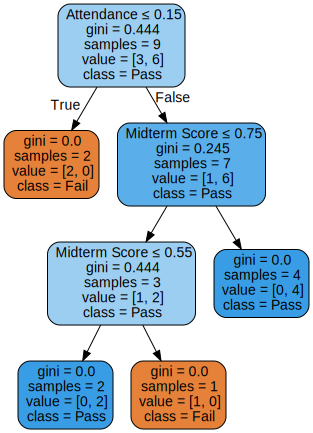

In [64]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(
    clf, 
    out_file=None, 
    feature_names=feature_names, 
    class_names=target_names, 
    filled=True, 
    rounded=True, 
    special_characters=True
)  
graph = graphviz.Source(dot_data)  
graph 


## End of Tutorial 'Quiz'
It's [here](https://create.kahoot.it/).